In [5]:
from IPython.core.display import display, HTML

display(HTML("<a href=https://pandas.pydata.org/>Pandas</a>"))
# !pip install pandas-datareader 
import pandas_datareader as pdr

import pandas as pd
print(pd.__version__)

import numpy as np
display(HTML("<a href=link> Numpy </a>"))
print(np.__version__)

import matplotlib
import matplotlib.pyplot as plt
display(HTML("<a href=link> Matplotlib </a>"))
print(matplotlib.__version__)
%matplotlib inline

import datetime
display(HTML())
# print(datetime.__version__)

# !pip install TA-Lib 
import math as m

0.23.4


1.15.4


3.0.2


<IPython.core.display.HTML object>

                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-04-20  180.500000  176.770004  177.410004  178.240005  16110700   
2020-04-21  175.380005  168.339996  175.250000  170.800003  24850500   
2020-04-22  184.779999  178.139999  178.449997  182.279999  33369900   
2020-04-23  187.050003  183.149994  184.080002  185.130005  21375300   
2020-04-24  184.679993  180.824997  183.229996  180.960007   3100411   

             Adj Close  
Date                    
2020-04-20  178.240005  
2020-04-21  170.800003  
2020-04-22  182.279999  
2020-04-23  185.130005  
2020-04-24  180.960007  
                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-01-03  210.399994  206.949997  207.210007  208.669998  11188400   
2020-01-06  212.779999  206.520004  206.699997  212.600006  17058900   
2020-01-07  214.580002  211.7500

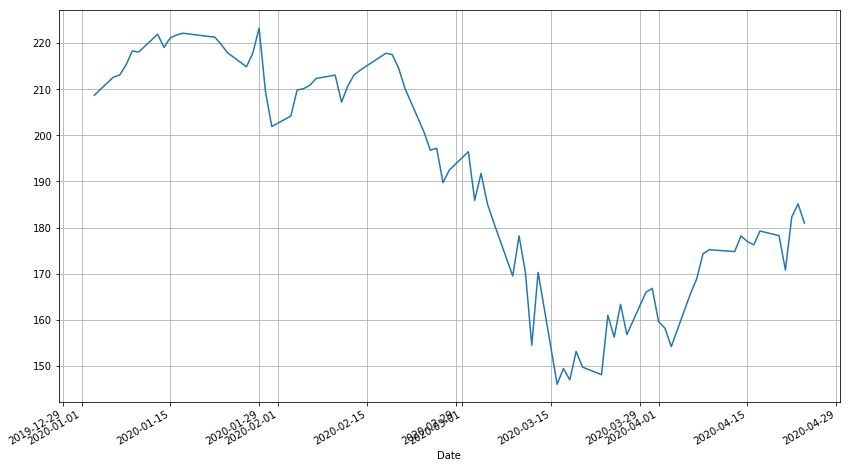

In [6]:
stock ="FB"
start = datetime.datetime(2020, 1, 3)
end = datetime.date.today()
# Obtinerea datelor de pe site-ul yahoo
FB = pdr.get_data_yahoo(stock, start, end)
print(FB.tail())
print(FB.head())
print(FB.describe())
# Afisarea graficului pentru preturile de inchidere
FB['Close'].plot(figsize=(14, 8), grid=True)

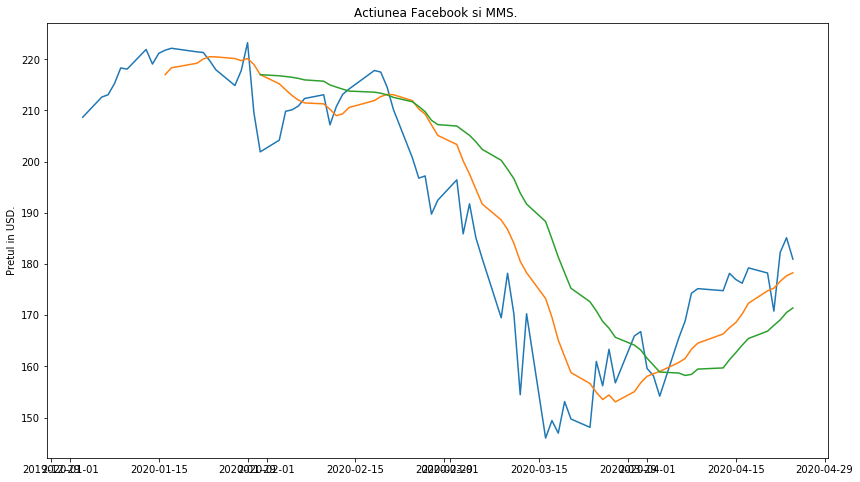

In [7]:
# Calcularea mediei mobile simple (SMA)
def media_mobila_simpla(actiune, nr_zile):
  act_mms = actiune.rolling(window=nr_zile).mean()
  return act_mms
label =" MMS 10"
FB_mms_10 = media_mobila_simpla(FB['Close'], 10)
label1="MMS 20"
FB_mms_20 = media_mobila_simpla(FB['Close'], 20)

fig, ax = plt.subplots(figsize=(14, 8))
ax = plt.plot(FB['Close'], label="Pretul la inchidere")
ax = plt.plot(FB_mms_10, label=label)
ax = plt.plot(FB_mms_20, label=label1)
plt.title("Actiunea Facebook si MMS. ")
plt.ylabel("Pretul in USD.");


4. Exponential Moving Average


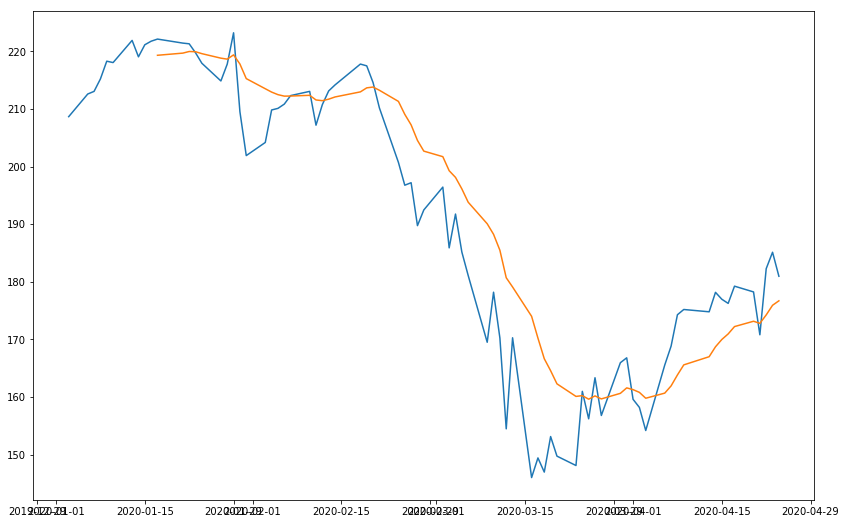

In [8]:
print("4. Exponential Moving Average")

def EMA(df,n):
  EMA = df.ewm(span=n, min_periods=n-1).mean().rename('EMA_'+str(n))
  #df = df.join(EMA)
  return EMA

fig, ax = plt.subplots(figsize=(14, 9))
ax = plt.plot(FB['Close'])
ax = plt.plot(EMA(FB['Close'], 12))

 5. Momentum .
                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-01-03  210.399994  206.949997  207.210007  208.669998  11188400   
2020-01-06  212.779999  206.520004  206.699997  212.600006  17058900   
2020-01-07  214.580002  211.750000  212.820007  213.059998  14912400   
2020-01-08  216.240005  212.610001  213.000000  215.220001  13475000   
2020-01-09  218.380005  216.279999  217.539993  218.300003  12642800   
2020-01-10  219.880005  217.419998  219.199997  218.059998  12119400   
2020-01-13  221.970001  219.210007  219.600006  221.910004  14463400   
2020-01-14  222.380005  218.630005  221.610001  219.059998  13288900   
2020-01-15  221.679993  220.139999  220.610001  221.149994  10036500   
2020-01-16  222.630005  220.389999  222.570007  221.770004  10015300   
2020-01-17  222.289993  220.529999  222.029999  222.139999  15905900   
2020-01-21  222.369995  219.119995  222.160004  2

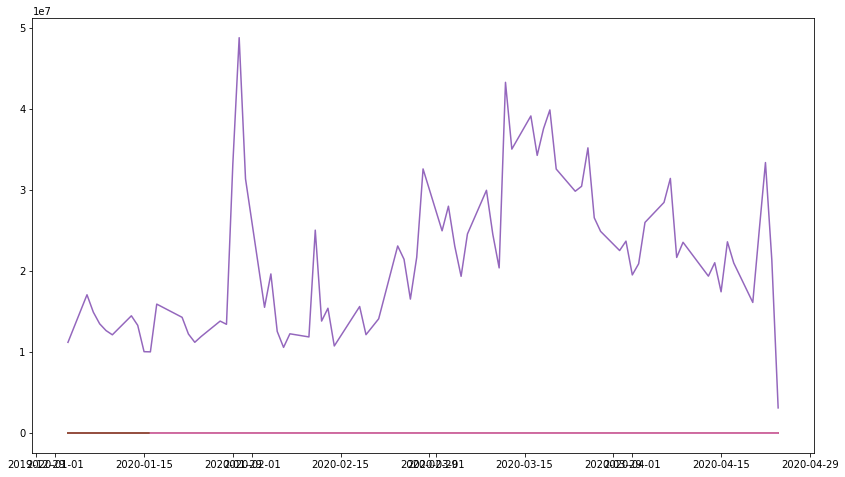

In [9]:
print(" 5. Momentum .")

def MOM(df, n):
  M = pd.Series(df['Close'].diff(n), name='Momentum_'+str(n))
  df = df.join(M)
  return df

print(MOM(FB, 9))

fig, ax = plt.subplots(figsize=(14, 8))
#ax = plt.plot(FB['Close'])
ax = plt.plot(MOM(FB,9))